In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd
sys.path.append('../src')
import lcp
from sklearn.linear_model import LogisticRegression

# train 3 models

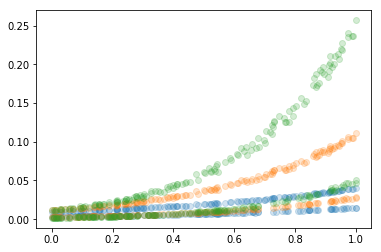

In [2]:
np.random.seed(13)
N = 300
p = 4
X = np.random.rand(N, p)
X[:, 1] = (X[:, 1] > 0.5).astype(np.int32)
y = (X[:, 0] > 0.95).astype(np.int32) * (X[:, 1] > 0.5).astype(np.int32)

models = []
for class_weight in [0.5, 1, 2]:
    m = LogisticRegression(solver='lbfgs', random_state=13, class_weight={0: 1, 1: class_weight})
    m.fit(X, y)
    plt.plot(X[:, 0], m.predict_proba(X)[:, 1], 'o', label=str(class_weight), alpha=0.2)
    models.append(deepcopy(m))

# model importances

In [3]:
np.random.seed(13)
x = np.random.rand(1, p)
x[:, 1] = 0
strategy = 'independent' # gaussian_kde

**get feature importances**

In [4]:
explainer = lcp.Explainer(X, strategy=strategy)
explainer.explain_instance(x, models[1].predict_proba, return_table=True)

,contribution,sensitivity
x1,-0.021,0.053
x0,0.006,0.041
x2,0.001,0.002
x3,0,0.001


**visualize a particular feature locally**

contribution: 0.006, sensitivity pos: 0.041


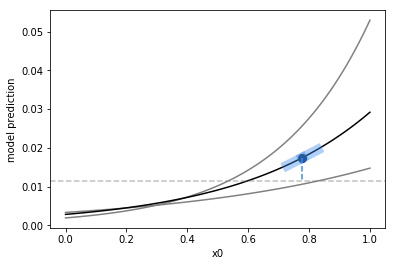

In [5]:
fig = plt.figure()
feature_num = 0
expl_dict = explainer.explain_instance_feature(x, models[1].predict_proba, feature_num=feature_num)

ice_top = explainer.calc_ice_grid(x, models[0].predict_proba, feature_num)
ice_bot = explainer.calc_ice_grid(x, models[2].predict_proba, feature_num)

plt.plot(ice_top[0], ice_top[1][:, 1], color='gray')
plt.plot(ice_bot[0], ice_bot[1][:, 1], color='gray')
print(f'contribution: {expl_dict["contribution"]:0.03f}, sensitivity pos: {expl_dict["sensitivity_pos"]:0.3f}')

explainer.viz_expl_feature(expl_dict)

**visualize all features interactively**

In [ ]:
explainer.calc_percentiles(models[1].predict_proba, models[0].predict_proba, 
                           models[2].predict_proba)

In [44]:
expl_dicts = []
for i in range(3):
    expl_dicts.append(explainer.explain_instance(x, models[i].predict_proba, return_table=False))
explainer.viz_expl(expl_dicts[1], [expl_dicts[0], expl_dicts[2]], filename='out.html')

s <br>Prediction: <span style="color:rgb(57, 138, 242);font-weight:bold;font-size:40px">1.74</span>	             Uncertainty: <span style="color:rgb(57, 138, 242);font-weight:bold;font-size:40px">1.51</span><br><span style="color:gray;font-size:13px">Perc. 100</span>	                                   <span style="color:gray;font-size:13px">Perc. 100</span><br>	 <span style="font-weight:italic;font-size:15px">Point ID: Unknown</span><br>
